# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 



1. [Открытие исходных данных](#start)
   * [Вывод](#resume1)


2. [Предобработка данных](#preprocessing)
   * [Заполнение пропусков](#null)
   * [Изменение типов даных](#change_types)
   * [Удаление дубликатов](#dublicated)
   * [Вывод](#resume2)
    
    
3. [Добавление данных](#addition)
   * [Вывод](#resume3)


4. [Анализ данных](#analisys)
   * [Частота продаж в завимсимости от площади, высоты потолков, числа комнат](#frequency)
   * [Изучение длительности продаж](#time)
   * [Влияние на цену основных показателей квартиры](#factor)
   * [Наиболее популярные населенные пункты](#top_10)
   * [Изучение стоимости квартир в центра города](#centr)
   * [Вывод](#resume4)


5. [Заключение. Общий вывод](#resume)

## Открытие исходных данных
<a id="#start"></a>

Импорт библтиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pylab as pl

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('d:/Home/datasets/real_estate_data.csv', sep="\t")
except:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [3]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
print(data['rooms'].sort_values().unique())
print(data['rooms'].value_counts().sum())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]
23699


### Вывод
 Имеются пропуски в столбцах. Найдено несоотвествие типов даных, параметры по смыслу целочисленные, либо признак категориальный и имеет значение да/нет. Выявленые пропуски в признаках посмотрим детально и выберем наиболее подходящий способ заполннения. Требуется приведение к нижнему регистру в  ряде признаков. Также формат даты требует приведения к убодному формату. Ряд признаков требет обработки, максимальные или минимальные значения выходит за границы возможных значений. Также имеются выбросы, которые необходимо отбросить.

## Предобработка данных
<a id="preprocessing"></a>

In [9]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

### Заполнение пропусков
<a id="null"></a>

In [10]:
data[['balcony']] = data[['balcony']].fillna(value=0)

Посмотрим разброс среднего и медианы цены в зависимости от числа комнат и выберем каким значением заполнять

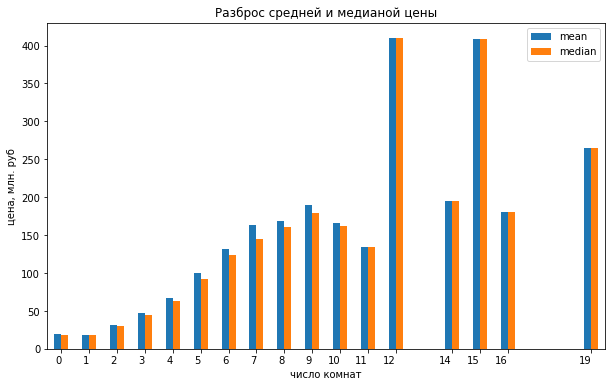

In [11]:
ax = (data
      .groupby('rooms')['living_area']
      .agg(['mean','median'])
      .plot(kind='bar', figsize=(10,6))
     )

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

pl.title("Разброс средней и медианой цены");
pl.xlabel("число комнат");
pl.ylabel("цена, млн. руб");

In [12]:
data['living_area'] = data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.mean()))
data['kitchen_area'] = data.groupby('studio')['kitchen_area'].apply(lambda x: x.fillna(value=0))
data['ceiling_height'].fillna((data['ceiling_height'].median()), inplace=True)
data['is_apartment'].fillna(value = False, inplace=True)
data['days_exposition'] = data.groupby('rooms')['days_exposition'].apply(lambda x: x.fillna(x.mean()))

Удаление выбросов `locality_name`, `floors_total`, `last_price`отмеченых в предпросмотре

In [13]:
df = data.dropna(subset=['locality_name']).reset_index(drop=True)
df = df.dropna(subset=['floors_total']).reset_index(drop=True)
df = df.query('last_price > 2e5 and ceiling_height < 5')


Возможные причины пропусков `living_area` ошибка выгрузки. Информация важная. Заполняетя средним по типу квартир
 
Возможные причины пропусков `kitchen_area`  - не указано для студий, для них кухня как отдельное помещение отсутствует. Скорее всего не заполнено при подаче объявления. Для студий заполняется значением 0
  
Возможные причины пропусков  `ceiling_height` не заполнена при подаче объявления. Заполняетя средним по типу квартир
   
Возможные причины пропусков `is_apartment` информация важная только для апартаментов, потому что нежилой фонд, но для квартир не являющихся апартаметами этот признак не важен и потому не указан. Для всех квартир заполняетя False
      
Возможные причины пропусков `days_exposition` - человеческий фактор, не указано при продаже. Заполняется средним по типу квартир


### Обработка дубликатов
<a id="dublicated"></a>

Есть ли дубликаты?  Проверка

In [14]:
print(df.duplicated().sum())
df.isnull().sum()

0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5513
city_centers_nearest     5490
parks_around3000         5489
parks_nearest           15513
ponds_around3000         5489
ponds_nearest           14506
days_exposition             0
dtype: int64

### Преобразование типов
<a id="change_types"></a>

Замена формата first_day_exposition на %Y-%m-%dT%H:%M:%S, замена типов на int

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df = df.astype(
    {'balcony': 'int', 'floors_total': 'int', 
     'parks_around3000': 'int', 'parks_around3000': 'int',
     'ponds_around3000' : 'int', 'days_exposition': 'int'}, 
    errors = 'ignore')


### Вывод
 
Произвели переименование признака для дальнейшего удобства работы. Заполнили те пропуски, которые поддаются автоматическрму заполнению по какому-либо правилу.  Изменен тип данных на int для параметров, являющихся по смыслу целочисленными, например количество дней или количество парков



## Добавление данных
<a id="addition"></a>

In [16]:
# Функция возращает по номеру этажа признак этажа: первый, последний, другой
def floor_feature(floor, floors_total):
    if floor == 1:
        return 'первый'
    if (floor > 1) & (floor < floors_total):
        return 'другой'   
    return 'последний'


Добавим цену за 1 м2 `price_meter` равную значению стоимости / значение общей площади, `living_ratio` отношение жилой площади `living_area` к ощбей площади `total_area`, `kitchen_ratio` отношение площади кухни `kitchen_area` к ощбей площади `total_area`, признак этажа: первый, последний, другой `floor_feature`, выделены из даты и добавлены год, месяц, день недели 

In [17]:
df['meter_price'] = df.last_price / df.total_area
df['living_ratio'] = df.living_area / df.total_area
df['kitchen_ratio'] = df.kitchen_area / df.total_area
df['floor_feature'] = df.apply(lambda x: floor_feature(x['floor'], x['floors_total']), axis=1)
df['day'] = df['first_day_exposition'].dt.day
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year 
df['price'] = df.last_price * 1e-6

### Вывод 
<a id="resume3"></a>


Добавленные признаки облегчат дальнейший анализ поскольку есть нормированные признаки и можно сравнивать разные нормированные показатели



## Анализ данных
<a id="analisys"></a>

###  Частота продаж  в зависимости от площади, цены, числа комнат, высоты потолков
<a id="frequency"></a>

Text(0, 0.5, 'Количество')

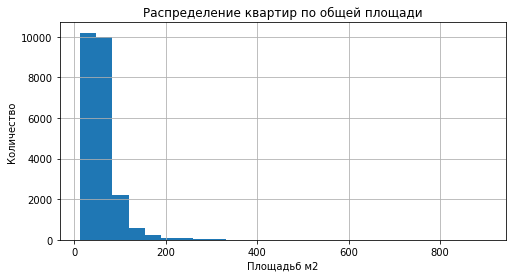

In [18]:
df.hist(column = 'total_area', bins = 25, figsize=(8,4));
pl.title("Распределение квартир по общей площади")
pl.xlabel("Площадьб м2")
pl.ylabel("Количество")

Распределение квартир в зависимости от площади почти нормальное, имеются хвосты.

Посмотрим распределение по количеству комнат и среднюю площадь в группе

In [19]:
df.query('rooms < 7').groupby('rooms')['total_area'].agg(['count','mean'])

,count,mean
rooms,,
0,192,29.127135
1,7993,37.636632
2,7883,55.813168
3,5773,77.705067
4,1170,107.461154
5,323,160.322260
6,103,201.816990


Посмотрим распределение числа квартир от числа комнат

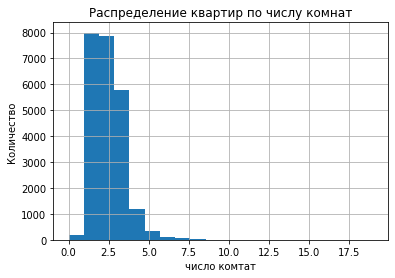

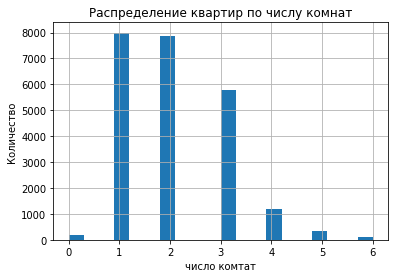

In [20]:
df.hist(column='rooms', bins=20);
pl.title("Распределение квартир по числу комнат");
pl.xlabel("число комтат");
pl.ylabel("Количество");

df.query('rooms < 7').hist(column='rooms', bins=20);
pl.title("Распределение квартир по числу комнат");
pl.xlabel("число комтат");
pl.ylabel("Количество");

Самые продаваемые 1,2,3 комнатные.

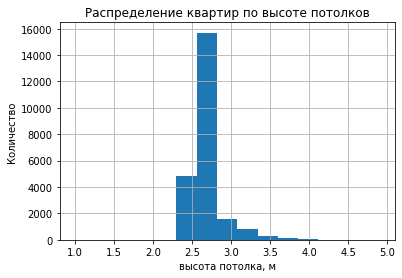

In [21]:
df.hist(column='ceiling_height',bins = 15);
pl.title("Распределение квартир по высоте потолков");
pl.xlabel("высота потолка, м");
pl.ylabel("Количество");

Покупатели предпочитают высоту потолков 2.7-2.8м.

###  Изучение длительности продаж
<a id="time"></a>

* Зависимость срока продажи от числа комнат

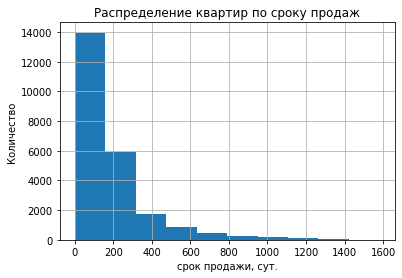

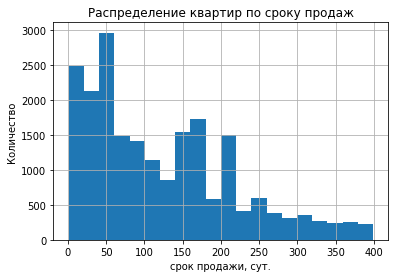

In [22]:
df.hist(column='days_exposition',bins = 10);
pl.title("Распределение квартир по сроку продаж");
pl.xlabel("срок продажи, сут.");
pl.ylabel("Количество");

df.query('days_exposition < 400').hist(column='days_exposition', bins=20);
pl.title("Распределение квартир по сроку продаж");
pl.xlabel("срок продажи, сут.");
pl.ylabel("Количество");

In [23]:
df.query('rooms < 7').groupby('rooms')['days_exposition'].agg(['count','mean'])

,count,mean
rooms,,
0,192,111.072917
1,7993,158.780683
2,7883,172.954078
3,5773,204.135978
4,1170,253.977778
5,323,305.606811
6,103,274.660194


Больше половины квартир, продаются в среднем за полгодв, а 90% в среднем продаются в течение года. Быстро продаются студии, в среднем менее четырех месяце.

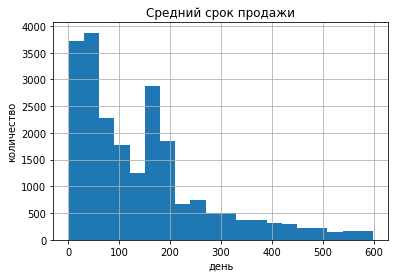

In [24]:
df.query('days_exposition < 600').hist(column='days_exposition', bins=20);
pl.title("Средний срок продажи");
pl.xlabel("день");
pl.ylabel("количество");

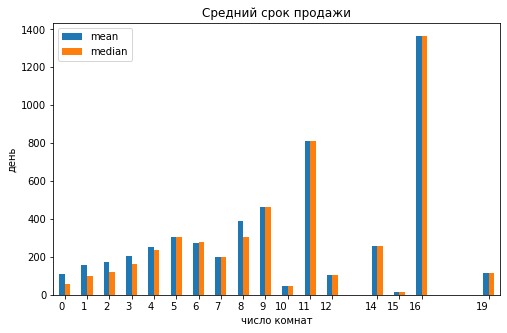

In [25]:
ax = (df
      .groupby('rooms')['days_exposition']
      .agg(['mean','median'])
      .plot(kind='bar', figsize=(8,5)));

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

ax.set_title('Средний срок продажи');
ax.set_xlabel('число комнат');
ax.set_ylabel('день');

квартиры с числом комнат 10, 12, 15, 19 продаются неоправданно быстро.

In [26]:
df['group_days_exposition'] = pd.cut(df['days_exposition'],[0,200,400,600,800,100000])
df.groupby('group_days_exposition')['rooms'].agg(['count'])

,count
group_days_exposition,
"(0, 200]",16381
"(200, 400]",4528
"(400, 600]",1425
"(600, 800]",605
"(800, 100000]",588


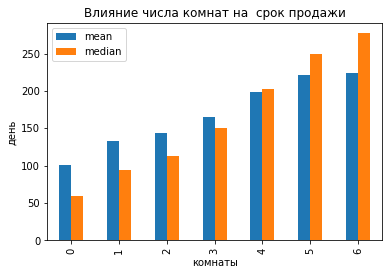

In [27]:
df = df.query(('rooms < 7 and 5 < days_exposition < 600')).reset_index()
df.groupby('rooms')['days_exposition'].agg(['mean','median']).plot(kind='bar');
pl.title("Влияние числа комнат на  срок продажи");
pl.xlabel("комнаты");
pl.ylabel("день");

Самые быстропродаваемые - студии, зависимость с ростом числа комнат  лтинейная.

* Распределение квартир в зависимости от цены

### Зависимость цены от основных параметров квартиры
<a id="factor"></a>

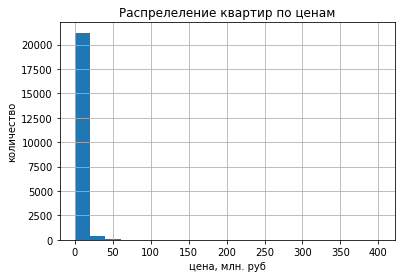

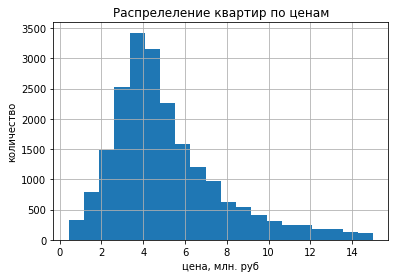

In [28]:
df.hist(column='price',bins = 20)
pl.title("Распрелеление квартир по ценам");
pl.xlabel("цена, млн. руб");
pl.ylabel("количество");

df = df.query('0.2 < price < 15').reset_index()
#df.query('0.2 < price < 15').hist(column='price', bins=20)
df.hist(column='price', bins=20)

pl.title("Распрелеление квартир по ценам");
pl.xlabel("цена, млн. руб");
pl.ylabel("количество");

In [29]:
df['city_centers_round'] = df['city_centers_nearest'].apply(lambda x: x*0.001)
df['city_centers_round'] = df['city_centers_round'].apply(np.floor)

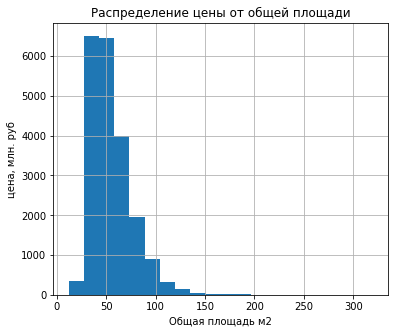

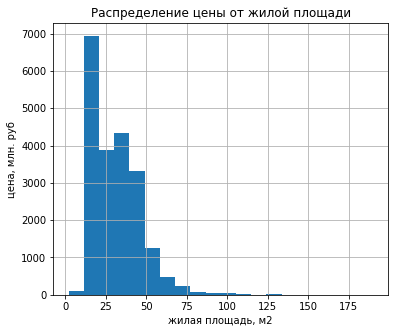

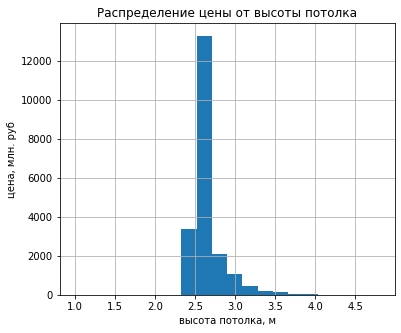

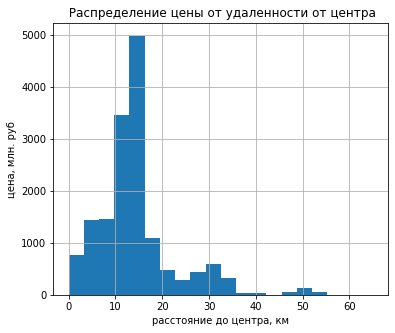

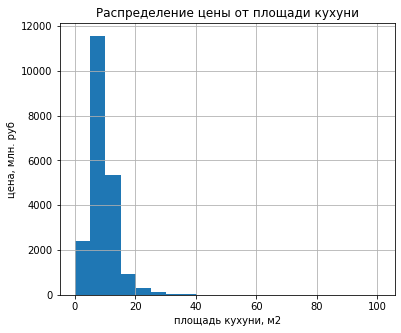

In [30]:
x = ['total_area', 'living_area', 'ceiling_height', 'city_centers_round', 'kitchen_area']
y = df['price']
title = ['Распределение цены от общей площади', 'Распределение цены от жилой площади'
        , 'Распределение цены от высоты потолка', ' Распределение цены от удаленности от центра'
        , 'Распределение цены от площади кухуни']
label = ['Общая площадь м2', 'жилая площадь, м2', 'высота потолка, м'
        , 'расстояние до центра, км', 'площадь кухуни, м2']

for j in range(len(x)):
    #print(x[j])
    df.hist(column = x[j], bins = 20, figsize=(6,5)); 
    #plt.hist(x[j],bins = 25)
    plt.title(title[j]);
    plt.xlabel(label[j]);
    plt.ylabel("цена, млн. руб");
    plt.show()


Распределения по параметрам похожи на нормальное. Диапазон цен наиболе часто продаваемых кварти 3-5 млн руб

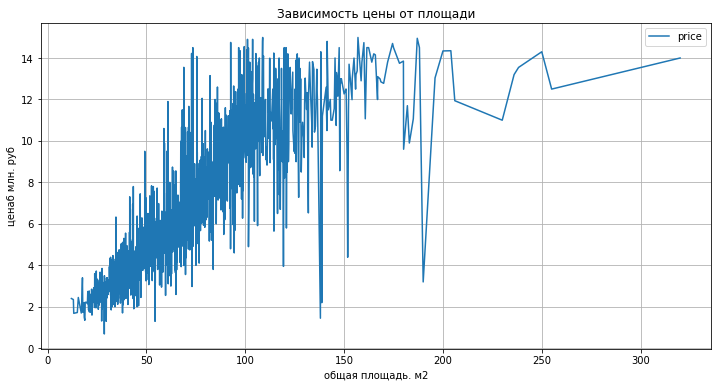

In [31]:
(df
    .pivot_table(index='total_area', values=['price'])
    .plot(grid=True, figsize=(12, 6))
)
#ax.legend(["Зависимость цены от площади"]);
pl.title("Зависимость цены от площади");
pl.xlabel("общая площадь. м2");
pl.ylabel("ценаб млн. руб");

** Каша. Решено добавить новый столбец - округленные до ближашего целого значения площади. Отсечение просто пиковых значений не помогает

Оценка количества значений, которыми можно принебречь. Округление до ближайшего значение площади квартиры

In [32]:
df['total_area_round'] = df['total_area'].apply(np.floor)

In [33]:
df['group_price'] = pd.cut(df['price'],[0,5, 10, 15, 20, 25, 1000])
df.groupby('group_price')['rooms'].agg(['count'])

,count
group_price,
"(0, 5]",12485
"(5, 10]",6945
"(10, 15]",1299
"(15, 20]",0
"(20, 25]",0
"(25, 1000]",0


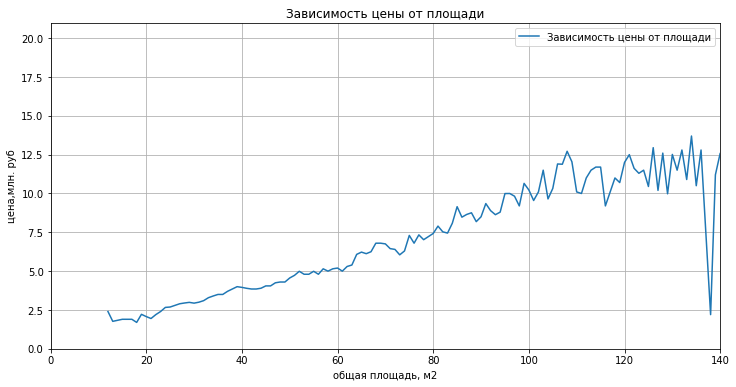

In [34]:
ax = (df
      .pivot_table(index='total_area_round', values='price',  aggfunc = 'median')
      .plot(grid=True, figsize=(12, 6), style='-', xlim=(0,140), ylim=(0,21))
     )

ax.legend(["Зависимость цены от площади"]);
ax.set_title('Зависимость цены от площади');
ax.set_xlabel('общая площадь, м2');
ax.set_ylabel('цена,млн. руб');

Рост цены на квартиру от роста площади квартиры линейный.

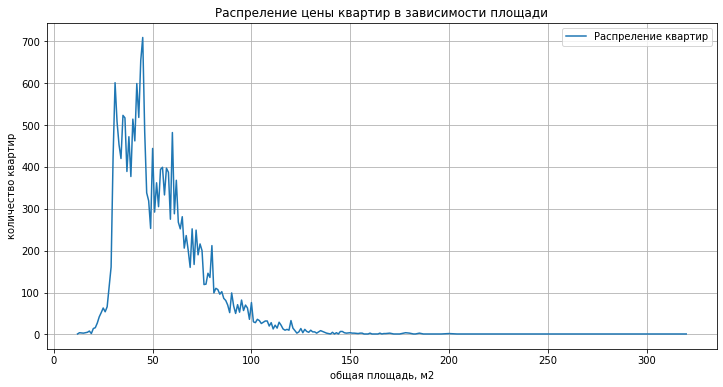

In [35]:
# Распреление количества квартир по ценам в зависимости от площади 
ax = (df
      .pivot_table(index='total_area_round', values='price', aggfunc = 'count')
      .plot(grid=True, figsize=(12, 6), style='-')
)

ax.legend(["Распреление квартир"]);
ax.set_title('Распреление цены квартир в зависимости площади');
ax.set_xlabel('общая площадь, м2');
ax.set_ylabel('количество квартир');


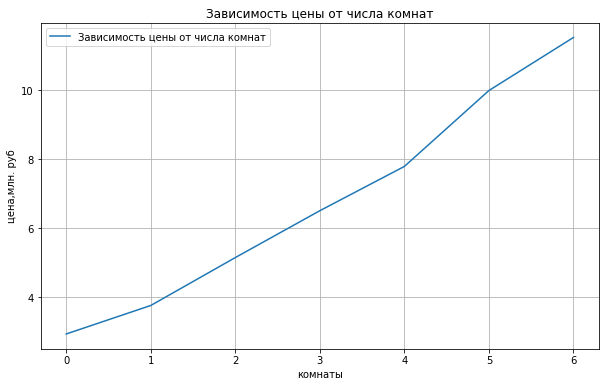

In [36]:
ax = (df
    .pivot_table(index='rooms', values=['price'])
    .plot(grid=True, figsize=(10, 6), style='-')
)
ax.legend(["Зависимость цены от числа комнат"]);
ax.set_title('Зависимость цены от числа комнат');
ax.set_xlabel('комнаты');
ax.set_ylabel('цена,млн. руб');


Рост цены на квартиру от числа комнат квартиры линейный, ожидаемо.


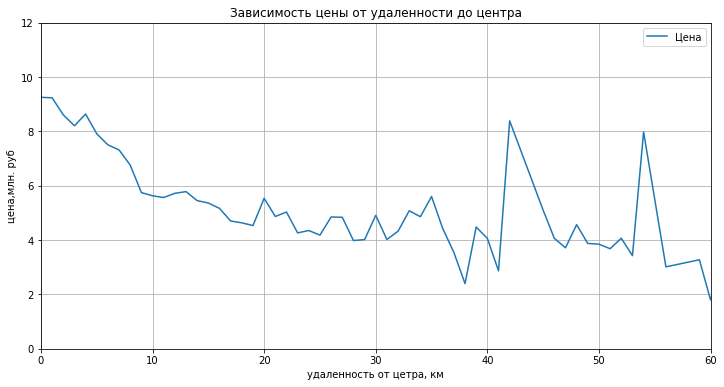

In [37]:
ax = (df
#    .query('last_price < 1e8')
    .pivot_table(index='city_centers_round', values=['price'])
    .plot(grid=True, figsize=(12, 6), style='-', ylim=(0,12), xlim=(0,60))
)
ax.legend(["Цена"]);
ax.set_title('Зависимость цены от удаленности до центра');
ax.set_xlabel('удаленность от цетра, км');
ax.set_ylabel('цена,млн. руб');

 Пики возможно не выбросы, возможно Приморский или Курортный район, Петергоф, Пушкин. Надо смотреть детально 

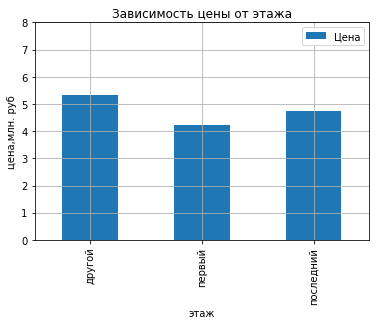

In [38]:
ax = df.pivot_table(index='floor_feature', values=['price']).plot(kind='bar',  grid=True, ylim=(0,8))
ax.legend(["Цена"]);
ax.set_title('Зависимость цены от этажа');
ax.set_xlabel('этаж');
ax.set_ylabel('цена,млн. руб');

Квартиры на средних этажах дороже в среднем на 15%.

* Частота покуок в зависимости от этажа

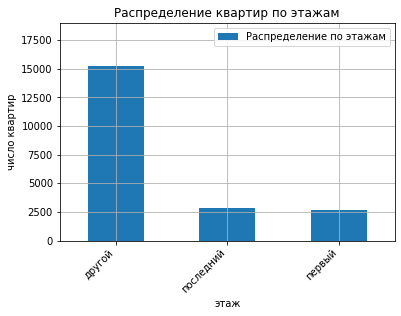

In [39]:
#df['floor_feature'].value_counts()
ax = df['floor_feature'].value_counts().plot(kind='bar', grid=True, ylim=(0,19000))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  ha='right')

ax.legend(["Распределение по этажам"]);
ax.set_title('Распределение квартир по этажам');
ax.set_xlabel('этаж');
ax.set_ylabel('число квартир');

Покупать предпочитают на средних этажах. Более 70%

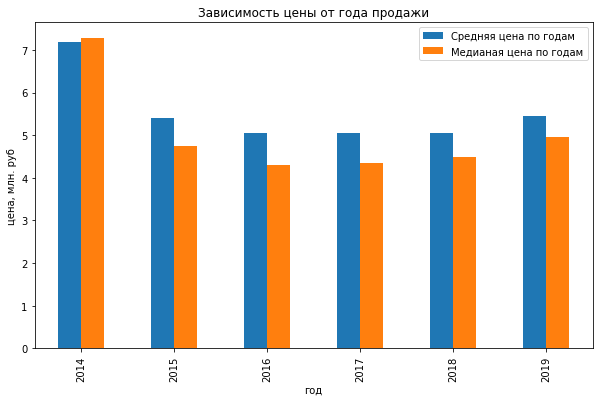

In [40]:
ax = (df
      .groupby('year')['price']
      .agg(['mean','median'])
      .plot(kind='bar', figsize=(10,6))
     )

ax.legend(["Средняя цена по годам", "Медианая цена по годам"]);
ax.set_title('Зависимость цены от года продажи');
ax.set_xlabel('год');
ax.set_ylabel('цена, млн. руб');

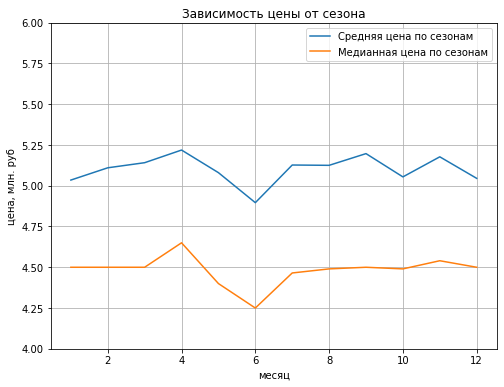

In [41]:
ax = (df
      .groupby('month')['price']
      .agg(['mean', 'median'])
      .plot(ylim=(4,6) ,figsize=(8,6), grid=True)
     )

ax.legend(["Средняя цена по сезонам", "Медианная цена по сезонам" ])
ax.set_title('Зависимость цены от сезона');
ax.set_xlabel('месяц');
ax.set_ylabel('цена, млн. руб');

Просадка цен  в июне может быть связана с отпусками, апрель, ноябрь незначительных всплеск цены.

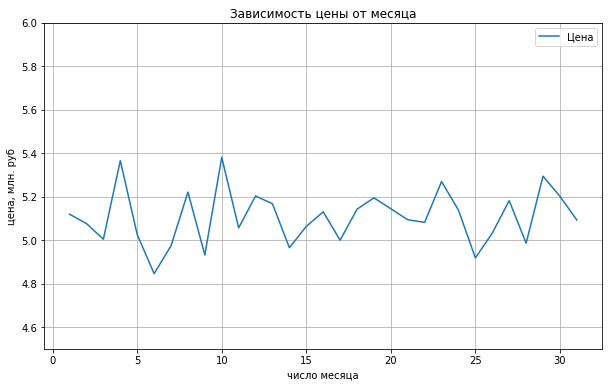

In [42]:
ax = (df
      .groupby('day')['price']
      .agg(['mean'])
      .plot( ylim=(4.5,6), figsize=(10,6), grid=True)
     )
ax.legend(["Цена"])
ax.set_title('Зависимость цены от месяца');
ax.set_xlabel('число месяца');
ax.set_ylabel('цена, млн. руб');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

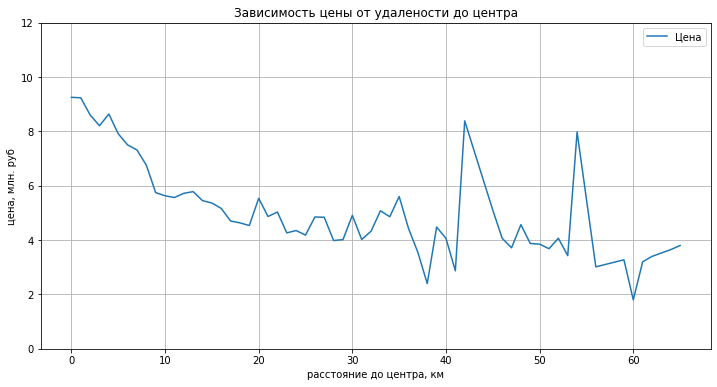

In [43]:
ax = (df
    .pivot_table(index='city_centers_round', values=['price'])
    .plot(grid=True, figsize=(12, 6), style='-', ylim=(0,12))
)

ax.set_title('Зависимость цены от удалености до центра');
ax.legend(["Цена"]);
ax.set_xlabel('расстояние до центра, км');
ax.set_ylabel('цена, млн. руб');

Нелинейное снижение цены от удалености от центра города. Пики возможно Бизнес поселки или курортный район.

### Наиболее популярные  населеные пункты 
<a id="top_10"></a>

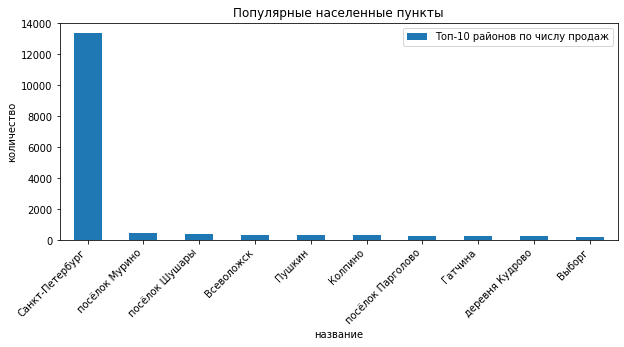

In [44]:
#df.groupby('locality_name')['last_price'].mean().sort_values(ascending=False).head(10).plot(kind='pie')
top_10 = (df
 .groupby('locality_name')['locality_name']
 .count()
 .sort_values(ascending=False)
 .head(10)
)
ax = top_10.plot(kind='bar',figsize=(10, 4));
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

ax.set_title('Популярные населенные пункты');
ax.legend(["Топ-10 районов по числу продаж"]);
ax.set_xlabel('название');
ax.set_ylabel('количество');

In [45]:
top_10_slice = df.query('locality_name in @top_10.index')

(top_10_slice
    .groupby('locality_name')['meter_price']
    .agg(['count','mean','min', 'max'])
    .style.format({'mean': '{:.0f}' ,'min': '{:.0f}' ,'max': '{:.0f}'}))

,count,mean,min,max
locality_name,,,,
Всеволожск,369,67278,31400,136424
Выборг,220,57965,18750,94805
Гатчина,280,68981,10507,146316
Колпино,318,75185,47957,125000
Пушкин,322,100197,59836,159898
Санкт-Петербург,13360,107167,15345,387097
деревня Кудрово,269,92571,54160,142857
посёлок Мурино,484,85814,50000,138580
посёлок Парголово,309,90123,48405,138522


** Не очень понятно, построим гистограмму - среднее, минимальное и максимальное значение цены за 1 м2 по 10 топ населенным пунктам

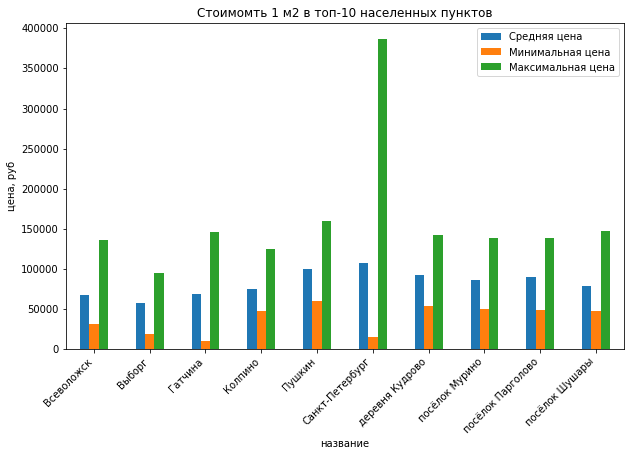

In [46]:
ax = (top_10_slice
    .groupby('locality_name')['meter_price']
    .agg(['mean','min', 'max'])
    .plot(kind='bar', figsize=(10,6))
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Стоимомть 1 м2 в топ-10 населенных пунктов');
ax.legend(["Средняя цена", 'Минимальная цена', 'Максимальная цена']);
ax.set_xlabel('название');
ax.set_ylabel('цена, руб');


Средняя цена топ-10 населенных пунктов. Пригороды по средней цене и максимальной между сосбой отличиаются мало, в Санкт-Петербурге максимальная цена значительно выше. Возможно по причине наличия бизнес жилья

In [47]:
bedroom_area = df.query('city_centers_round < 7').reset_index(drop=True)
bedroom = df[['price','rooms', 'total_area', 'ceiling_height', 'city_centers_round']] 
bedroom.corr()

,price,rooms,total_area,ceiling_height,city_centers_round
price,1.000000,0.486185,0.741153,0.380432,-0.350041
rooms,0.486185,1.000000,0.797049,0.136516,-0.112084
total_area,0.741153,0.797049,1.000000,0.307475,-0.162334
ceiling_height,0.380432,0.136516,0.307475,1.000000,-0.254188
city_centers_round,-0.350041,-0.112084,-0.162334,-0.254188,1.000000


* Средняя цена для каждого километра.
* График цены за 1 м2

  
Для спальных районов на цену влияет общая и жилая площадь, высота потолков и число комнаь оказывает менее заментное влияение. Дальность от центра имеет обратную зависимость на цену


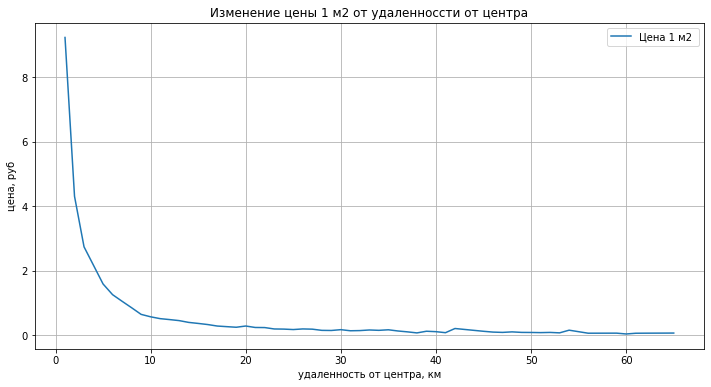

In [48]:
df['price_one'] = df.price / df.city_centers_round

ax = df.pivot_table(index='city_centers_round', values=['price_one']).plot(grid=True, figsize=(12, 6), style='-')
ax.set_title('Изменение цены 1 м2 от удаленноссти от центра');
ax.legend(["Цена 1 м2 "]);
ax.set_xlabel('удаленность от центра, км');
ax.set_ylabel('цена, руб');


** Будем считать центром - удаление не более чем на 7 км

### Изучения цен на кварттиры в центре города
<a id="centr"></a>

Центральный округ в радиусе 7 км от центра

In [49]:
center_area = df.query('city_centers_round < 7').reset_index(drop=True)
center = df[['price','rooms', 'total_area_round', 'ceiling_height'
             , 'city_centers_round', 'kitchen_area',  'living_area']] ;


center.corr()

,price,rooms,total_area_round,ceiling_height,city_centers_round,kitchen_area,living_area
price,1.000000,0.486185,0.740838,0.380432,-0.350041,0.444333,0.608679
rooms,0.486185,1.000000,0.797011,0.136516,-0.112084,0.128847,0.890416
total_area_round,0.740838,0.797011,1.000000,0.307337,-0.162342,0.413208,0.904931
ceiling_height,0.380432,0.136516,0.307337,1.000000,-0.254188,0.224428,0.250389
city_centers_round,-0.350041,-0.112084,-0.162342,-0.254188,1.000000,-0.097265,-0.152466
kitchen_area,0.444333,0.128847,0.413208,0.224428,-0.097265,1.000000,0.189459
living_area,0.608679,0.890416,0.904931,0.250389,-0.152466,0.189459,1.000000


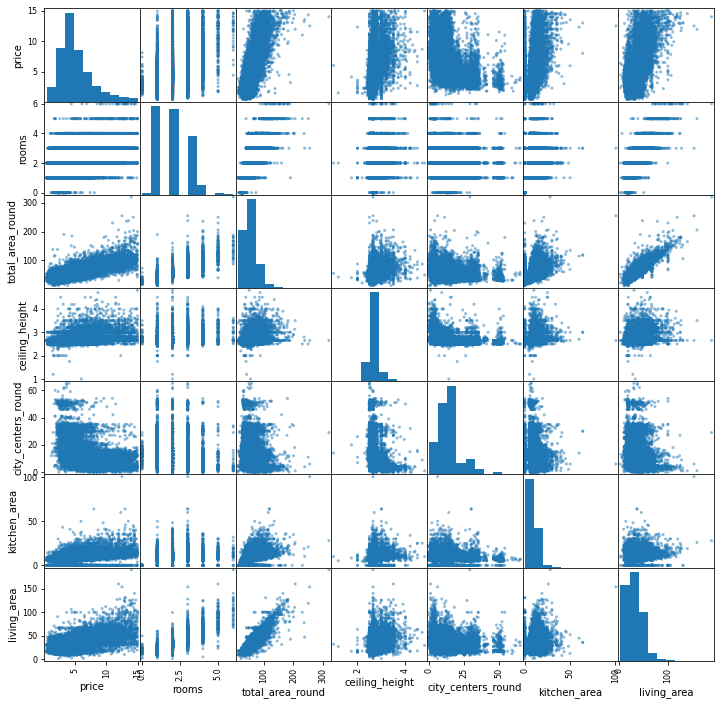

In [50]:
scatter_matrix(center,  figsize=(12, 12));
#center.info()

   
Сильнаая зависимость цены от общей площади. Жилая площадь, высота потолков и число комнат оказывает менее вырадженное влияние на стоимость квартиры


In [51]:
center_add = df[['price','floor_feature', 'month', 'year', 'day']] 
center_add.corr()

,price,month,year,day
price,1.000000,0.000596,0.016822,0.002837
month,0.000596,1.000000,-0.292695,-0.014244
year,0.016822,-0.292695,1.000000,-0.032104
day,0.002837,-0.014244,-0.032104,1.000000


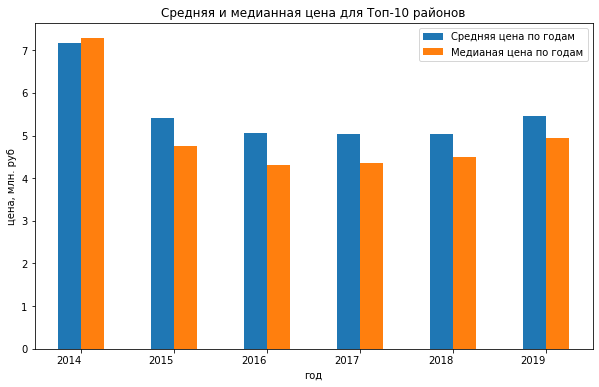

In [52]:

ax = (center_add
      .groupby('year')['price']
      .agg(['mean','median'])
      .plot(kind='bar', figsize=(10,6))
     )

ax.legend(["Средняя цена по годам", "Медианая цена по годам"]);
ax.set_title('Средняя и медианная цена для Топ-10 районов');
ax.set_xlabel('год');
ax.set_ylabel('цена, млн. руб');
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

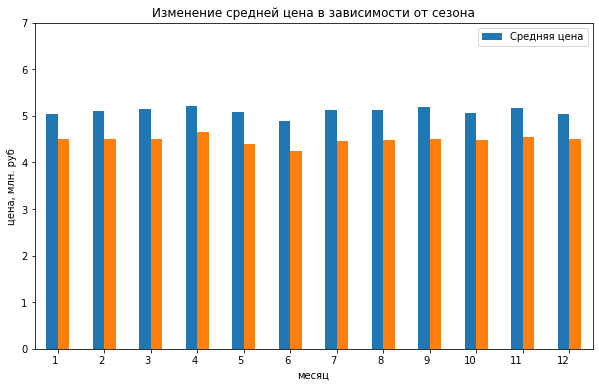

In [53]:
ax = (center_add
      .groupby('month')['price']
      .agg(['mean', 'median'])
      .plot(kind='bar', figsize=(10,6), ylim=(0,7))
     )

ax.set_title('Изменение средней цена в зависимости от сезона');
ax.legend(["Средняя цена"]);
ax.set_xlabel('месяц');
ax.set_ylabel('цена, млн. руб');
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

 Цена от сезона меняется не сильно, наблюдаются провалы в январе, июгн и сентябре. После провала цен в 2015 наблюдается слабый подъем цены.

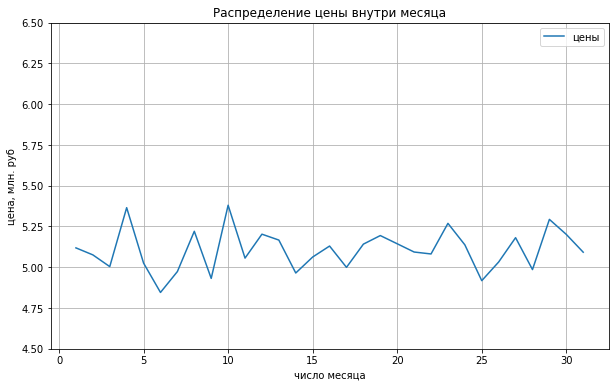

In [54]:
ax = (center_add
      .groupby('day')['price']
      .agg(['mean'])
      .plot(ylim=(4.5,6.5), grid=True, figsize=(10,6))
     )

ax.set_title('Распределение цены внутри месяца');
ax.legend(["цены"]);
ax.set_xlabel('число месяца');
ax.set_ylabel('цена, млн. руб');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

* Влияние этажа на частоту покупки

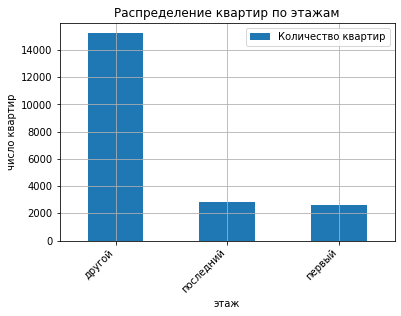

In [55]:
#df['floor_feature'].value_counts()
ax = center_add['floor_feature'].value_counts().plot(kind='bar',grid=True,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

ax.set_title('Распределение квартир по этажам');
ax.legend(["Количество квартир"]);
ax.set_xlabel('этаж');
ax.set_ylabel('число квартир');

### Вывод
<a id="resume4"></a>
  
Все зависимости имеют длинные хвосты или выбросы, которые были отброшены. Ввиду малой доли квартиры с площадью более 100 кв.м и числом комнат более 7 не учитываются. Отброшены квартиры со значением срока продажи менее 5 дней и более 50 дней. Основная доля  около 90% квартир, это квартиры площадью 37-78 кв.м. Более 90% продаваемых квартир это квартиры 1,2,3 комнатные. Среди продаваемых квартир 95% имеют среднююю высоту потолка от 2.2м до 3м. Около 60% продаваемых квартир имеют высоту потолка около 2.65м. В среднем стоимость наиболее продаваемых квартир составляет от 3 млн до 5 млн. В основном 90% кавартиры продаются в течении семи месяцев после опубликования объявления, а более половины квартир продается в течении первых трех месяцев. Квартиры, имеющие 4 и более комнаты продаются в среднем одинаково среди своего класса квартир. Наиболее быстропродаваемые студии, срок реализации менее трех месяцев.   Четко видна линейная зависимость между количеством комнать и временем продажи. Самые дешевые квартиры на первом этаже, дорогие на последнем. На некрайних этажах цена немного ниже чем на последнеих этажах. В основном (более 70% рынка)  средние этажи. Цена упала с 2014 и остается почти не изменяется в следующие года. Цена на кварттиры в зависимости от сезона - пик продаж в апреле и сентябре. Проседание продаж летом можно объяснить отпусками. Относителдьно влияния даты месяца на стоимость зависимость не найдена, наблюдаются колебания цены. Виден небольшой тренд к снижению цены в конце месяца. Для квартир в центре зависимостбь цены от даты месяца, сезона аналогичны зависимости для спальных районов, был отмечен провал в 2015-2019 г , в 2019 наблюдается рост цены  
Наиболее сильно на стоимость влияет общая площадь и жилая лощадь, заметное влияние от  высоты потолков и количества комнат.

## Заключение. Общий вывод
<a id="resume"></a>



 
Основная доля или около 90% квартир, это квартиры площадью 37-78 кв.м. Более 90% продаваемых квартир квартиры 1,2,3 комнатные. Среди продаваемых квартир 95% имеют среднююю высоту потолка от 2.2м до 3м. Более 60% продаваемых квартир имеют высоту потолка около 2.65м.
    
Основная доля квартир приходится на г.Санкт-Петербург и ближайшие пригороды.
    
В среднем около 90% кавартир продаются в течение семи месяцев после опубликования объявления, а более половины квартир продается в течение первых трех месяцев. Наиболее быстропродаваемы студии, срок реализации  которых менее трех месяцев. Четко видна линейная зависимость между количеством комнать и сроком продажи      
    
В среднем стоимость наиболее продаваемых квартир колеблется от 3 млн до 5 млн.  
    
Для центра города основными признаками влияющими на стоимость жилья являются общая площадь, жилая площадь, площадь кухни, число комнат и высота потолков. Все признаки распределены нормально или близко к номральному. Влияние общей и жилой порщади на цену очень сильное, площадь кухни, колтчество комнат и высота потолков влияют в меньшей степени. Степень удаленности от  центра города имеет обратную зависимость на цену. 
    
Самые дешевые квартиры  на первом этажъе, квартиры на последних этажах чуть дороже. Средние этажи самые дорогие. Разница в цене доходит до 20%. По количеству продаж средние этажи составляют более 70% рынка жилья.
Квартиры на последних и первых этажах продаются дольше в среднем на 20 дней, чем квартиры на других этажах.
    
 
Виден незначительный пик продаж в апреле и сентябре. Проседание продаж летом можно объяснить отпусками. Относительно влияния даты месяца на стоимость зависимость не найдена. Виден небольшой тренд к снижению цены в конце месяца.
    
   
